# Jesse Galef June 13, 2016

# Instructor Task
## Dataset
- [Here](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv) is the dataset.
- [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) is a description of the data. Ignore column 0 as it is merely the ID of a patient record.

In [1]:
import pandas as pd

## 1. Read in the data

In [2]:
#Based on the data dictionary/description linked above

feature_types = ['radius','texture','perimeter','area','smoothness','compactness','concavity',
                    'concave_points','symmetry','fractal_dimension']
feature_categories = ['mean','standard_error','worst']
column_names = ['ID','diagnosis']
for cat in feature_categories:
    for feat in feature_types:
        column_names.append(cat+"_"+feat)

# As it turns out, we never use the feature names


In [3]:
raw_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv',header=None)

In [4]:
raw_df.columns = column_names

In [5]:
raw_df.head()

,ID,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Separate the data into feature and target.

In [6]:
target = raw_df.diagnosis
features = raw_df[[col for col in raw_df if col not in ['ID','diagnosis']]]


In [7]:
target.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [8]:
features.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Create and evaluate using cross_val_score and 5 folds.
- What is the mean accuracy?
- What is the standard deviation of accuracy?

*I read this as asking me to create and evaluate a model, right? - Jesse*

In [9]:
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression


In [10]:

kf = 5
# kf = KFold(len(features), n_folds=5, shuffle=True, random_state=1)
# Uncomment the above line in order to shuffle the samples in crossvalidation

scores = cross_val_score(LogisticRegression(),features, target, cv=kf, scoring='accuracy') 

print "Scores: ",scores
print "Score mean: ",scores.mean()
print "Score standard deviation: ",scores.std()


Scores:  [ 0.93043478  0.93913043  0.97345133  0.94690265  0.96460177]
Score mean:  0.950904193921
Score standard deviation:  0.0159350389781


## 4. Get a classification report to identify type 1, type 2 errors.
- Use train_test_split to run your model once, with a test size of 0.33
- Make predictions on the test set
- Compare the predictions to the answers to determine the classification report

In [37]:
train_x, test_x, train_y, test_y = train_test_split(features,target, test_size=.33, random_state=42)

In [38]:
lm = LogisticRegression()
lm.fit(train_x,train_y)
print lm.score(test_x,test_y)

0.957446808511


In [39]:
from sklearn.metrics import classification_report

print classification_report(test_y, lm.predict(test_x), digits=3)


             precision    recall  f1-score   support

          B      0.967     0.967     0.967       121
          M      0.940     0.940     0.940        67

avg / total      0.957     0.957     0.957       188



## 5. Scale the data and see if that improves the score.

In [40]:
scaled_features = features.copy()
for col in scaled_features:
    scaled_features[col] = scaled_features[col]/scaled_features[col].std()

train_x, test_x, train_y, test_y = train_test_split(scaled_features,target, test_size=.33,random_state=42)
lm.fit(train_x,train_y)

print "Accuracy: ",lm.score(test_x,test_y)
print

print classification_report(test_y, lm.predict(test_x),digits=3)


Accuracy:  0.973404255319

             precision    recall  f1-score   support

          B      0.983     0.975     0.979       121
          M      0.956     0.970     0.963        67

avg / total      0.974     0.973     0.973       188



## 6. Tune the model using automated parametric grid search via LogisticRegressionCV. Explain your intution behind what is being tuned.

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lm_cv = LogisticRegressionCV(cv=kf)
# Still using kf = 5 for five folds. If the data is better shuffled, changing kf earlier 
# will still apply here.

The LogisticRegressionCV object uses cross-validation to test the accuracy of a logistic regression classifier when 10 different regularization values of C are used, from 1e-4 (.0001) to 1e4 (10000).

Lower values of C correspond to stronger regularization - penalizing overfitting, increasing bias in order to decrease variance from training-set to training-set.  

By automatically trying different values of C against k-folds of our dataset, we can get a sense of how much regularization is appropriate on this problem.

### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

We use the LogisticRegressionCV to try different regularizations values of C on folds of our data and seeing which value gives the best mean accuracy in its folds.

In [41]:
lm_cv.fit(train_x, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Q: What was the best C?

In [42]:
print "Best value of C is: ", lm_cv.C_


Best value of C is:  [ 0.35938137]


In [43]:
# Just to verify that:
scores = lm_cv.scores_['M']
for i, c in enumerate(lm_cv.Cs_):
    print c," had an average score of: ", sum([c_scores[i] for c_scores in scores])/float(len(scores))


0.0001  had an average score of:  0.622043745728
0.000774263682681  had an average score of:  0.858339029392
0.00599484250319  had an average score of:  0.942207792208
0.0464158883361  had an average score of:  0.965823650034
0.35938136638  had an average score of:  0.976349965824
2.78255940221  had an average score of:  0.968489405332
21.5443469003  had an average score of:  0.968489405332
166.81005372  had an average score of:  0.965892002734
1291.54966501  had an average score of:  0.955365686945
10000.0  had an average score of:  0.952768284347


## 7. Create Two Plots that describe the data and discuss your results

*I'm reading this question to ask about the data and model performance - not the data about how regularization impacts the accuracy or about attempting to visualize 30-dimensional data by using PCA.*

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix


In [44]:
train_x, test_x, train_y, test_y = train_test_split(scaled_features,target, test_size=.33,random_state=42)

lm_validated = LogisticRegression(C=lm_cv.C_[0])
lm_validated.fit(train_x,train_y)
print "Accuracy: ",lm_validated.score(test_x,test_y)
print 
results = pd.DataFrame(test_y)

predicted_proba = lm_validated.predict_proba(test_x)
results['predict_m'] = [b for [a,b] in predicted_proba]
results['predicted'] = lm_validated.predict(test_x)

print classification_report(test_y, results.predicted)
print "Confusion Matrix: "
print confusion_matrix(test_y, results.predicted)


Accuracy:  0.973404255319

             precision    recall  f1-score   support

          B       0.98      0.98      0.98       121
          M       0.97      0.96      0.96        67

avg / total       0.97      0.97      0.97       188

Confusion Matrix: 
[[119   2]
 [  3  64]]


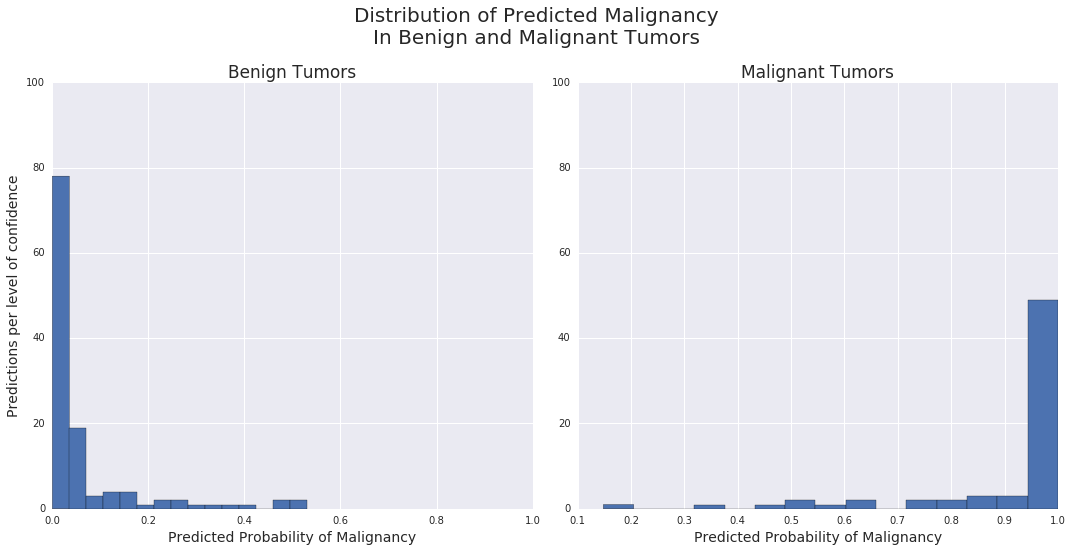

In [29]:
f = plt.figure(figsize=[15,8])
ax1 = plt.subplot(1,2,1)
results[results.diagnosis=='B'].hist(column='predict_m',bins=15,ax=ax1)
plt.xlim([0.0,1.0])
plt.xlabel("Predicted Probability of Malignancy",fontsize=14)
plt.ylabel("Predictions per level of confidence",fontsize=14)
plt.ylim([0,100])
plt.title("Benign Tumors",fontsize=17)

ax2 = plt.subplot(1,2,2)
results[results.diagnosis=='M'].hist(column='predict_m',bins=15,ax=ax2)
plt.xlabel("Predicted Probability of Malignancy",fontsize=14)
plt.ylim([0,100])
plt.title("Malignant Tumors",fontsize=17)
plt.suptitle("Distribution of Predicted Malignancy\nIn Benign and Malignant Tumors", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])


In [30]:
roc = roc_curve([1 if diag == 'M' else 0 for diag in test_y], results.predict_m)

AUC of  0.996422844455


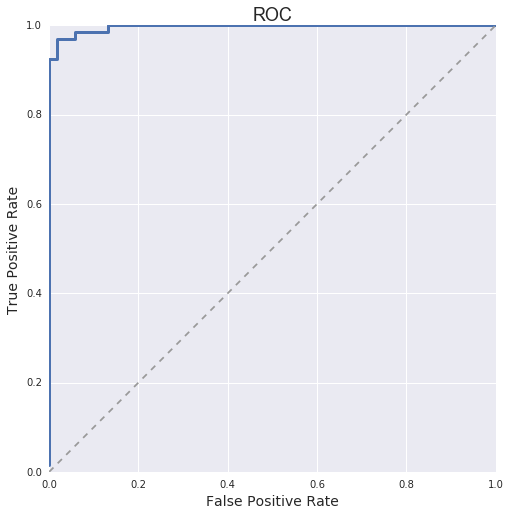

In [31]:
f = plt.figure(figsize=[8,8])
# This is the ROC curve
plt.plot(roc[0],roc[1], label='Logistic Regression Model', linewidth=3)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.title("ROC",fontsize=18)
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
print "AUC of ", auc(roc[0],roc[1])
plt.show() 


The model correctly identifies the vast majority of test samples with high confidence, as shown by the very skewed histogram plots. 

The AUC score for this classifier is 99.6%, indicating a very good ability to separate the two classes.


## 8. Provide a one-sentence summary for a non-technical audience. Then provide a longer paragraph-length technical explanation.

This machine learning model correctly diagnosed 183 people out of 188 (97.3%) based on the cell imaging, catching 64 of the 67 people who had malignant tumors, and falsely telling 2 of the 121 people with benign tumors that they were malignant.

Without scaling or regularization, a logistic regressior had an accuracy of ~95.7% on a test set of one third of the data.  After scaling the features and finding the best regularization parameter amount by using 5-fold cross-validation, the model improved to 97.3% accuracy with precision and recall of ~97% on the test set. There were 3 false negatives and 2 false positives out of 188 samples.  The AUC score for the classifier was ~99.6%, indicating a good ability to separate the two classes. Results could vary slightly with different random seeds in the train_test split, but are unlikely to change much.

